In [1]:
import sys
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
from scipy import stats
import plotly
plotly.tools.set_credentials_file(username='anirudhn',
                                 api_key='uaV7Q410noAGBd4zvNTS')
%matplotlib inline  

In [2]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [3]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

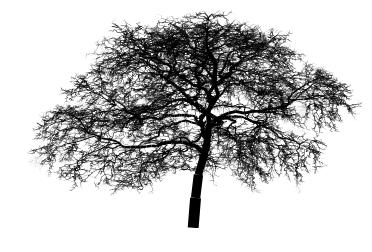

In [4]:
index = 40
swc = trees['swc'][index]
tree = McNeuron.Neuron(swc)
tree.basic_features()
McNeuron.visualize.plot_2D(tree, axis=(1,0,0), rotation=30, line_width=tree.diameter*20)

In [5]:
#McNeuron.visualize.plot_3D(tree)

In [6]:
def splitBranches(tree) :
    branches = np.where(tree.features['branch order']>=2)[0]
    numOfBranch = len(branches)
    subsets = [0] * numOfBranch
    for i in range(0,numOfBranch) :
        rest_swc = tree.get_rest_of_neuron_after_node(branches[i])
        n = McNeuron.Neuron(rest_swc)
        n.l_measure_features()
        n.motif_features()
        n.geometrical_features()
        n.l_measure_features()
        subsets[i] = n.getNeuronVector()
    return subsets

In [7]:
def getTreeBranchMaster(location):
    ind = np.where(trees['location']==location)[0]
    treeBranchMaster = [0] * len(ind)
    for i in range (0,len(ind)) :
        tree = McNeuron.Neuron(trees['swc'][ind[i]])
        tree.basic_features()
        treeBranchMaster[i] = splitBranches(tree)
        print(ind[i])
    return treeBranchMaster

In [8]:
# treeBranchMasterG = getTreeBranchMaster('Gabon')
# print('done')
# treeBranchMasterH = getTreeBranchMaster('Ghana')
# print('done')
# treeBranchMasterU = getTreeBranchMaster('UK')
# print('done')
# treeBranchMasterW = getTreeBranchMaster('Wytham Meteoc (UK)')
# print('done')

In [9]:
import pickle
# pickle.dump(treeBranchMasterG, open('treeBranchMasterG','wb') )
# pickle.dump(treeBranchMasterH, open('treeBranchMasterH','wb') )
# pickle.dump(treeBranchMasterU, open('treeBranchMasterU','wb') )
# pickle.dump(treeBranchMasterW, open('treeBranchMasterW','wb') )
treeBranchMasterG = pickle.load(open('treeBranchMasterG','rb'))
treeBranchMasterH = pickle.load(open('treeBranchMasterH','rb'))
treeBranchMasterU = pickle.load(open('treeBranchMasterU','rb'))
treeBranchMasterW = pickle.load(open('treeBranchMasterW','rb'))

In [10]:
def getFeature(feature, arr) :
    featureArray = [0] * len(arr)
    counter = 0
    for i in range(0, len(arr)) :
        x = [0] * len(arr[i])
        for j in range(0,len(arr[i])) :
            x[j] = arr[i][j][feature]
        featureArray[i-counter] = x
        if(len(x)==0) :
            featureArray = np.delete(featureArray,i)
            counter += 1
    return featureArray

In [11]:
def getFeatureAnalysisMatrixTree(feature, ran, bins) :
    featureG = getFeature(feature,treeBranchMasterG)
    featureH = getFeature(feature,treeBranchMasterH)
    featureU = getFeature(feature,treeBranchMasterU)
    featureW = getFeature(feature,treeBranchMasterW)
    matrix = np.zeros((4,4))
    ref = [featureG,featureH,featureU,featureW]
    ind = [[0,0],[0,1],[0,2],[0,3],[1,1],[1,0],[1,2],[1,3],[2,2],[2,1],[2,0],[2,3],[3,3],[3,1],[3,2],[3,0]]
    for v in range(0,len(ind)) :
        total = 0
        s = 0
        a = ref[ind[v][0]]
        b = ref[ind[v][1]]
        start = 0
        if v%4==0:
            print(v)
        for i in range(0,20) :
            if v%4==0 :
                start = i
            for j in range(start,20) :
                pdf0 = np.histogram(a[i],normed=True, bins=bins, range=ran)[0]
                pdf1 = np.histogram(b[j],normed=True, bins=bins, range=ran)[0]
                pdf0 = pdf0/sum(pdf0)
                pdf1 = pdf1/sum(pdf1)
                s += 1
                if (stats.ks_2samp(pdf0,pdf1)[1] < 0.05) :
                    total += 1
        matrix[ind[v][0]][ind[v][1]] = total/s
    return matrix

In [23]:
getFeatureAnalysisMatrixTree(feature, ran, bins)

0
4
8
12


array([[0.18095238, 0.12      , 0.2075    , 0.445     ],
       [0.12      , 0.02380952, 0.0925    , 0.43      ],
       [0.2075    , 0.0925    , 0.09047619, 0.4875    ],
       [0.445     , 0.43      , 0.4875    , 0.55714286]])

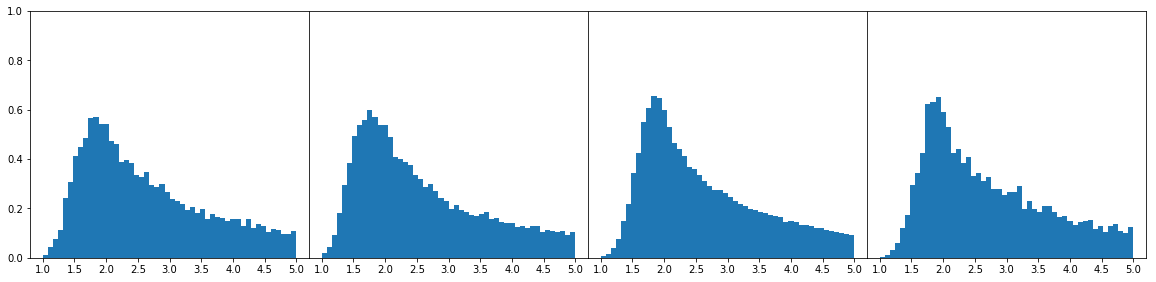

In [31]:
feature = 23
featureG = getFeature(feature,treeBranchMasterG)
featureH = getFeature(feature,treeBranchMasterH)
featureU = getFeature(feature,treeBranchMasterU)
featureW = getFeature(feature,treeBranchMasterW)
meanG = []
meanH = []
meanU = []
meanW = []
for i in range(0,20):
    meanG = np.concatenate((meanG,featureG[i]))
    meanH = np.concatenate((meanH,featureH[i]))
    meanU = np.concatenate((meanU,featureU[i]))
    meanW = np.concatenate((meanW,featureW[i]))

ran = (1,5)
yRan = (0,1)
bins = 50
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid((2, 4), (1, 0))
ax1.hist(meanG,normed=True,bins=bins,range=ran)
ax1.set_ylim(yRan)
ax2 = plt.subplot2grid((2, 4), (1, 1))
ax2.hist(meanH,normed=True,bins=bins,range=ran)
ax2.set_ylim(yRan)
ax2.set_yticks([])
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax3.hist(meanU,normed=True,bins=bins,range=ran)
ax3.set_ylim(yRan)
ax3.set_yticks([])
ax4 = plt.subplot2grid((2, 4), (1, 3))
ax4.hist(meanW,normed=True,bins=bins,range=ran)
ax4.set_ylim(yRan)
ax4.set_yticks([])
plt.subplots_adjust(wspace=0)

In [29]:
import pandas as pd
neurons = pd.read_pickle("/Users/anirudhnatarajan/Documents/UPenn/neuronData/neurons.csv")

In [30]:
help1 = np.where(neurons['Secondary Brain Region']=='CA1')[0]
help2 = np.where(neurons['Species Name']=='mouse')[0]
index_to_see = np.intersect1d(help1,help2)

indG = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='GABAergic')[0]
indP = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='pyramidal')[0]
indS = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='Somatostatin (SOM)-positive')[0]
indB = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='basket')[0]
indT = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='perisomatic targeting')[0]


def getSWC(ind) :
    length = len(ind)
    swc = [0] * length
    for i in range(0,length) :
        swc[i] = neurons['swc'][index_to_see[ind]][index_to_see[ind][i]]
    return swc

swcG = getSWC(indG)
swcP = getSWC(indP)
swcS = getSWC(indS)
swcB = getSWC(indB)
swcT = getSWC(indT)

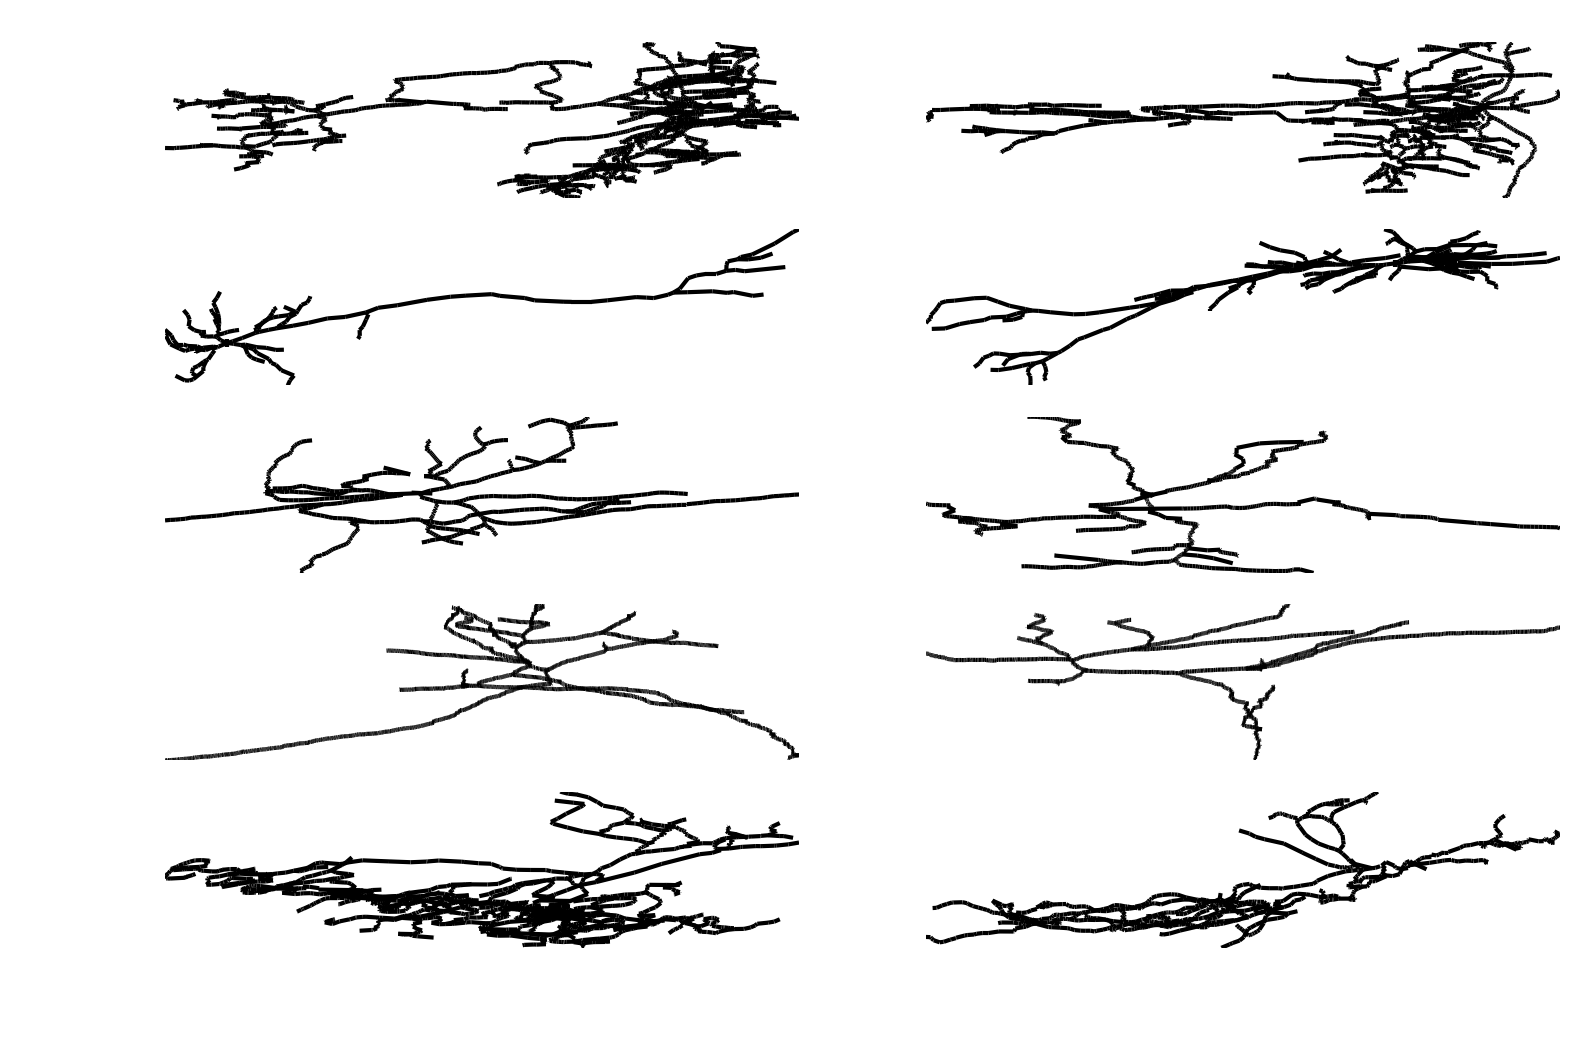

In [40]:
f,g = 5,2
fig, axis = plt.subplots(f,g)
fig.dpi=300
neuronInd = [5,12,0,12,13,12,1,19,16,8]
McNeuron.visualize.plot_2D(swcG[neuronInd[0]], pass_ax=True, ax=axis[0,0])
McNeuron.visualize.plot_2D(swcG[neuronInd[1]], pass_ax=True, ax=axis[0,1])
McNeuron.visualize.plot_2D(swcP[neuronInd[2]], pass_ax=True, ax=axis[1,0])
McNeuron.visualize.plot_2D(swcP[neuronInd[3]], pass_ax=True, ax=axis[1,1])
McNeuron.visualize.plot_2D(swcB[neuronInd[4]], pass_ax=True, ax=axis[2,0])
McNeuron.visualize.plot_2D(swcB[neuronInd[5]], pass_ax=True, ax=axis[2,1])
McNeuron.visualize.plot_2D(swcS[neuronInd[6]], pass_ax=True, ax=axis[3,0])
McNeuron.visualize.plot_2D(swcS[neuronInd[7]], pass_ax=True, ax=axis[3,1])
McNeuron.visualize.plot_2D(swcT[neuronInd[8]], pass_ax=True, ax=axis[4,0])
McNeuron.visualize.plot_2D(swcT[neuronInd[9]], pass_ax=True, ax=axis[4,1])

# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/neuronExamples.eps')
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/neuronExamples.png')

In [25]:
treeInd = [7,36,40,73]
nodeDistance = 0.1
treeArr = [McNeuron.Neuron(trees['swc'][treeInd[0]]), McNeuron.Neuron(trees['swc'][treeInd[1]]), McNeuron.Neuron(trees['swc'][treeInd[2]]), McNeuron.Neuron(trees['swc'][treeInd[3]])]
treeSubArr = [McNeuron.Neuron(treeArr[0].subsample(subsample_type='straigthen', length=nodeDistance)), McNeuron.Neuron(treeArr[1].subsample(subsample_type='straigthen', length=nodeDistance)), McNeuron.Neuron(treeArr[2].subsample(subsample_type='straigthen', length=nodeDistance)), McNeuron.Neuron(treeArr[3].subsample(subsample_type='straigthen', length=nodeDistance))]

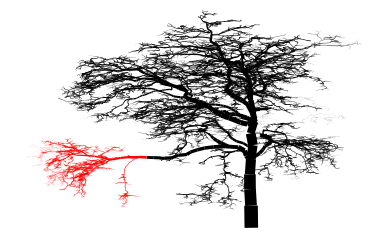

In [138]:
sample_tree = McNeuron.Neuron(trees['swc'][50])

McNeuron.visualize.plot_2D(sample_tree, rotation=30, node_index_red_after=80, line_width=sample_tree.diameter*30)

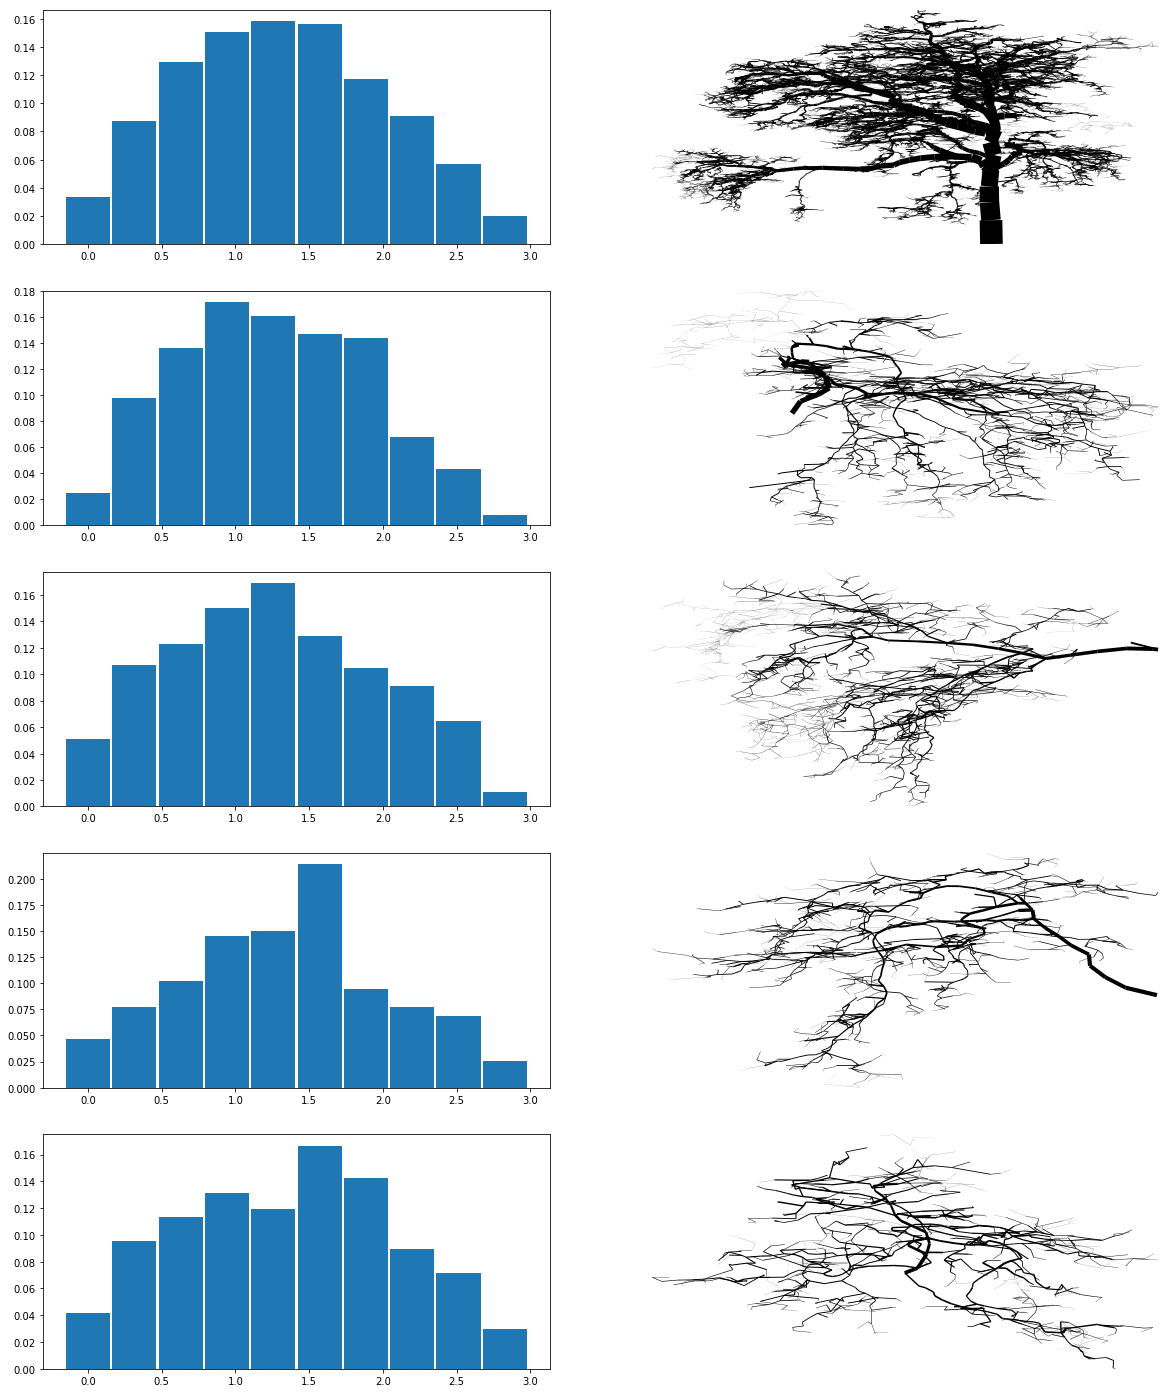

In [140]:
nodes = [0,20,80,100,310]
fig, ax = plt.subplots(len(nodes),2, figsize=(20, 25))
for node in range(len(nodes)):
    subtree_hist = McNeuron.Neuron(sample_tree.get_rest_of_neuron_after_node(nodes[node]))
    subtree_hist.geometrical_features()
    h = np.histogram(subtree_hist.features['branch angle'], range=(0, np.pi), bins=10)[0]
    h = h/sum(h)
    ax[node,0].bar(np.arange(0, np.pi, np.pi/10),h, width=.3)
    McNeuron.visualize.plot_2D(subtree_hist, rotation=30, line_width=subtree_hist.diameter*50, pass_ax=True, ax=ax[node,1])

# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/branchHistExamples.eps')
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/branchHistExamples.png')

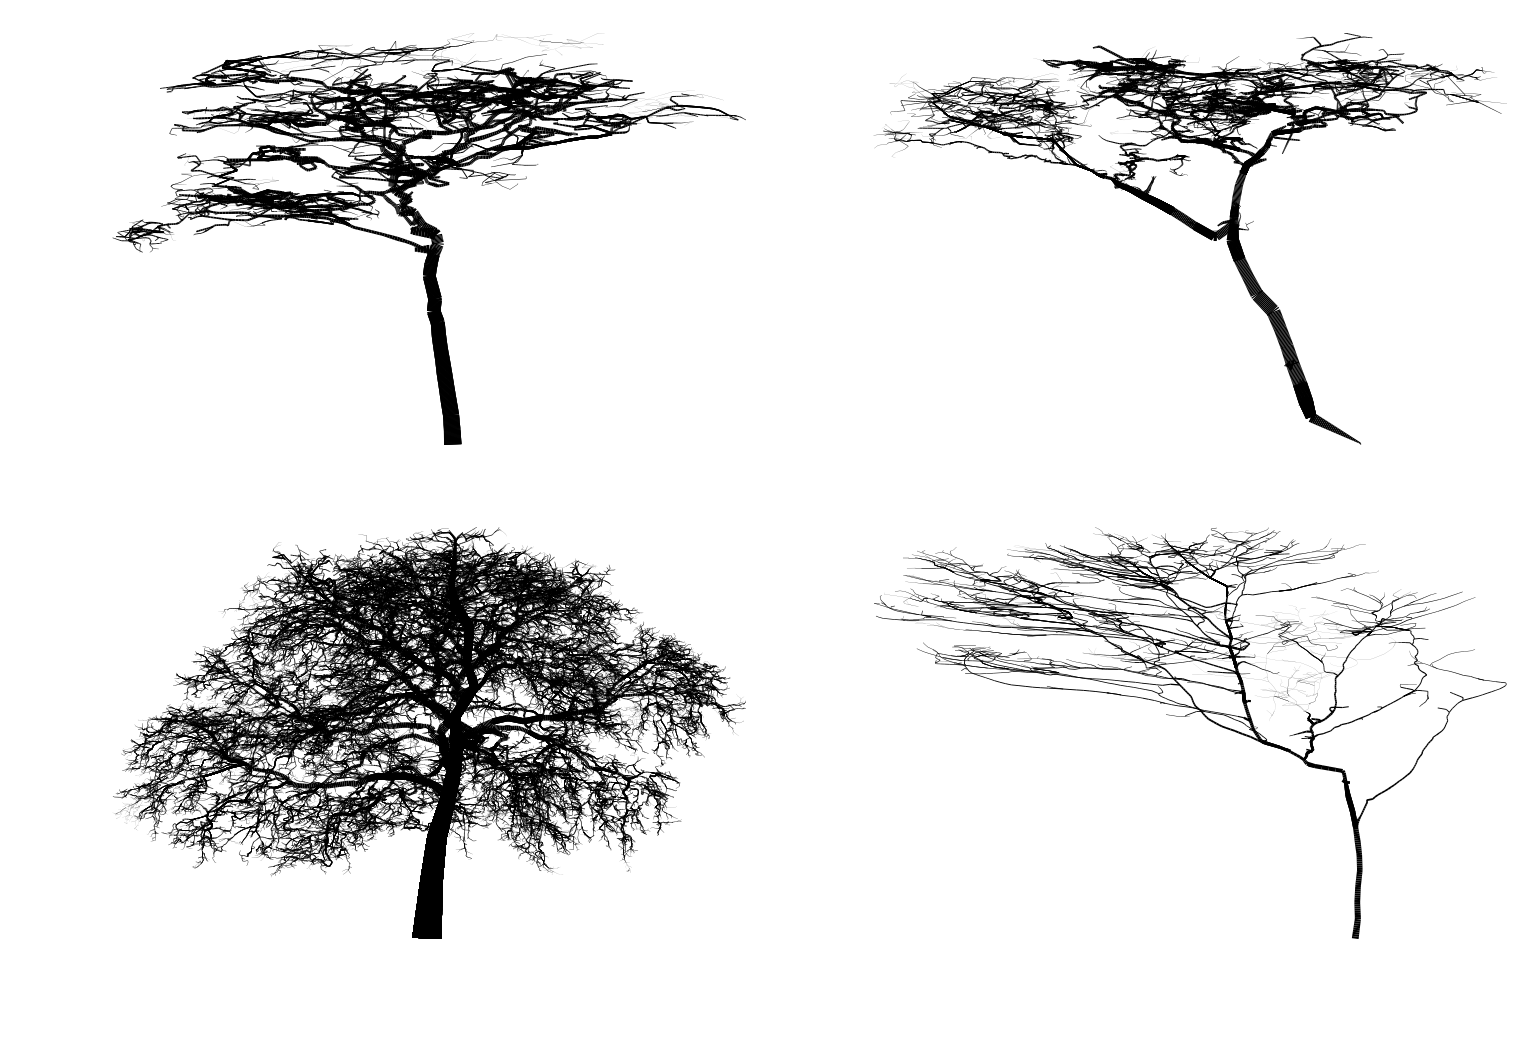

In [132]:
f,g = 2,2
fig, axis = plt.subplots(f,g)
fig.dpi=300
McNeuron.visualize.plot_2D(treeSubArr[0], axis=(1,0,0), rotation=30, pass_ax=True, ax=axis[0,0], line_width=treeSubArr[0].diameter*10)
McNeuron.visualize.plot_2D(treeSubArr[1], axis=(1,0,0), rotation=30, pass_ax=True, ax=axis[0,1], line_width=treeSubArr[1].diameter*10)
McNeuron.visualize.plot_2D(treeSubArr[2], axis=(1,0,0), rotation=30, pass_ax=True, ax=axis[1,0], line_width=treeSubArr[2].diameter*10)
McNeuron.visualize.plot_2D(treeSubArr[3], axis=(1,0,0), rotation=30, pass_ax=True, ax=axis[1,1], line_width=treeSubArr[3].diameter*10)

fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeExamples.eps')
fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeExamples.png')

In [42]:
def getNeurons(swc, size) :
    rand = np.linspace(0,len(swc)-1,len(swc))
    n = [0] * size
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        n[i] = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        if i%10==0 :
            print(i)
    print('done')
    return np.array(n)

In [43]:
size = 20

neuronG = getNeurons(swcG, size)
neuronP = getNeurons(swcP, size)
neuronS = getNeurons(swcS, size)
neuronB = getNeurons(swcB, size)
neuronT = getNeurons(swcT, size)

0
10
done
0
10
done
0
10
done
0
10
done
0
10
done


In [44]:
def getNeuronBranchMaster(arr):
    neuronBranchMaster = [0] * len(arr)
    for i in range (0,len(arr)) :
        n = arr[i]
        n.basic_features()
        neuronBranchMaster[i] = splitBranches(n)
        if i%10==0 :
            print(i)
    print('done')
    return neuronBranchMaster

In [45]:
neuronBranchMasterG = getNeuronBranchMaster(neuronG)
neuronBranchMasterP = getNeuronBranchMaster(neuronP)
neuronBranchMasterS = getNeuronBranchMaster(neuronS)
neuronBranchMasterB = getNeuronBranchMaster(neuronB)
neuronBranchMasterT = getNeuronBranchMaster(neuronT)

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:2077: RuntimeWarning:

Mean of empty slice.

/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:2068: RuntimeWarning:

Mean of empty slice.



0
10
done
0
10
done
0
10
done
0
10
done
0
10
done


In [ ]:
def getFeatureAnalysisMatrixNeuron(feature,ran, bins) :
    featureG = getFeature(feature,neuronBranchMasterG)
    featureP = getFeature(feature,neuronBranchMasterP)
    featureS = getFeature(feature,neuronBranchMasterS)
    featureB = getFeature(feature,neuronBranchMasterB)
    featureT = getFeature(feature,neuronBranchMasterT)
    matrix = np.zeros((5,5))
    ref = [featureG,featureP,featureS,featureB,featureT]
    ind = [[0,0],[0,1],[0,2],[0,3],[0,4],[1,0],[1,1],[1,2],[1,3],[1,4],[2,0],[2,1],[2,2],[2,3],[2,4],[3,0],[3,1],[3,2],[3,3],[3,4],[4,0],[4,1],[4,2],[4,3],[4,4]]
    for v in range(0,len(ind)) :
        total = 0
        s=0
        a = ref[ind[v][0]]
        b = ref[ind[v][1]]
        for i in range(0,len(a)) :
            start = 0
            if a==b :
                start = i
            for j in range(start,len(b)) :
                pdf0 = np.histogram(a[i],normed=True, bins=bins, range=ran)[0]
                pdf1 = np.histogram(b[j],normed=True, bins=bins, range=ran)[0]
                pdf0 = pdf0/sum(pdf0)
                pdf1 = pdf1/sum(pdf1)
                s += 1
                if (stats.ks_2samp(pdf0,pdf1)[1] < 0.05) :
                    total += 1
        matrix[ind[v][0]][ind[v][1]] = total/s
        if v%5==0 :
            print(v)
    return matrix

In [ ]:
getFeatureAnalysisMatrixNeuron(feature, ran, bins)

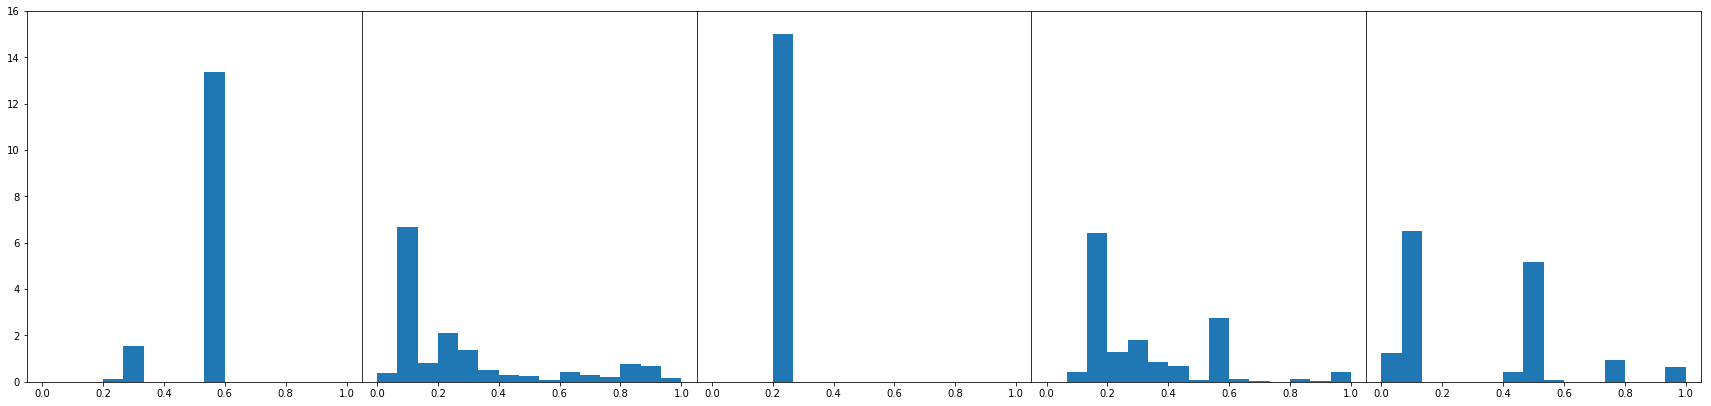

In [50]:
feature = 2
featureG = getFeature(feature,neuronBranchMasterG)
featureP = getFeature(feature,neuronBranchMasterP)
featureS = getFeature(feature,neuronBranchMasterS)
featureB = getFeature(feature,neuronBranchMasterB)
featureT = getFeature(feature,neuronBranchMasterT)
meanG = []
meanP = []
meanS = []
meanB = []
meanT = []
for i in range(0,len(featureG)):
    meanG = np.concatenate((meanG,featureG[i]))
    meanP = np.concatenate((meanP,featureP[i]))
    meanS = np.concatenate((meanS,featureS[i]))
    meanB = np.concatenate((meanB,featureB[i]))
    meanT = np.concatenate((meanT,featureT[i]))

bins = 15
ran = (0,1)
ylim = [0,16]
fig = plt.figure(figsize=(30, 15))
ax1 = plt.subplot2grid((2, 5), (1, 0))
ax1.set_ylim(ylim)
ax1.hist(meanG,normed=True,bins=bins,range=ran)
ax2 = plt.subplot2grid((2, 5), (1, 1))
ax2.set_ylim(ylim)
ax2.hist(meanP,normed=True,bins=bins,range=ran)
ax2.set_yticks([])
ax3 = plt.subplot2grid((2, 5), (1, 2))
ax3.set_ylim(ylim)
ax3.hist(meanS,normed=True,bins=bins,range=ran)
ax3.set_yticks([])
ax4 = plt.subplot2grid((2, 5), (1, 3))
ax4.set_ylim(ylim)
ax4.hist(meanB,normed=True,bins=bins,range=ran)
ax4.set_yticks([])
ax5 = plt.subplot2grid((2, 5), (1, 4))
ax5.set_ylim(ylim)
ax5.hist(meanT,normed=True,bins=bins,range=ran)
ax5.set_yticks([])

# ax3 = plt.subplot2grid((2, 2), (0, 0))
# McNeuron.visualize.plot_2D(swcO[ind[0]], pass_ax=True, ax=ax3, line_width=McNeuron.Neuron(swcO[ind[0]]).diameter)
# ax4 = plt.subplot2grid((2, 2), (0, 1))
# McNeuron.visualize.plot_2D(swcO[ind[3]], pass_ax=True, ax=ax4, line_width=McNeuron.Neuron(swcO[ind[3]]).diameter)

plt.subplots_adjust(wspace=0)

In [ ]:
print('🍎🍜🍦🌾🍴🍩🍯 🍼. 🍜🍎🌮🍎🌾🍎🍹🍎🍜')